# Chapter 2. Data and Sampling Distributions

In [3]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.utils import resample
import matplotlib.pylab as plt

In [4]:
ETF_DATA_MSCI  = 'data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv'

# Sampling Distribution of a Statistic

In [5]:
etf_data = pd.read_csv(ETF_DATA_MSCI)['Adj Close']

#print(etf_data)

sample_data = pd.DataFrame({
    'Adjusted Closing Price': etf_data.sample(1000),
    'type': 'Data',
})

sample_mean_05 = pd.DataFrame({
    'Adjusted Closing Price': [etf_data.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

sample_mean_20 = pd.DataFrame({
    'Adjusted Closing Price': [etf_data.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05 , sample_mean_20])
print(results.head())

      Adjusted Closing Price  type
3406               72.519997  Data
574                20.600000  Data
425                21.180000  Data
149                20.090000  Data
3152               73.652000  Data


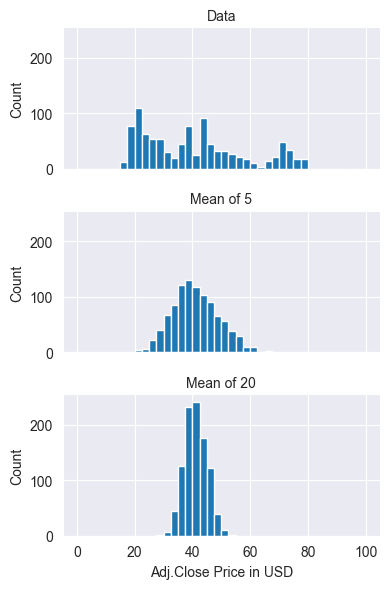

In [6]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'Adjusted Closing Price', range=[0, 100], bins=40)
g.set_axis_labels('Adj.Close Price in USD', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# The Bootstrap

In [7]:
results = []
for nrepeat in range(1000):
    sample = resample(etf_data)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {etf_data.median()}')
print(f'bias: {results.mean() - etf_data.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 39.09
bias: 0.07442997550000285
std. error: 0.30695965709547934


# Confidence Intervals

41.30592765749855
40.15035045


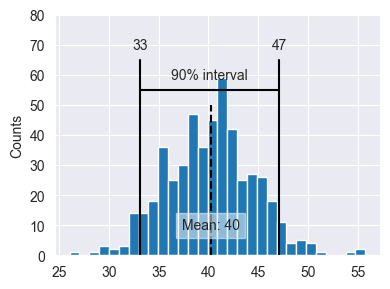

In [8]:
print(etf_data.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(etf_data, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

# Normal Distribution
## Standard Normal and QQ-Plots


# Long-Tailed Distributions

 Poisson and Related Distribution
## Poisson Distributions

## Exponential Distribution

##  Weibull Distribution